In [1]:
import numpy as np
points=np.random.uniform(low=-10,high=10,size=(100000,2))
distance_from_origin=np.sqrt(points[:,0]**2+points[:,1]**2)
condition=np.where((np.floor(distance_from_origin)%2==1)  & (distance_from_origin<=10 ))
X = points[condition]

In [33]:
condition_colors=np.where((np.floor(np.sqrt(X[:,0]**2+X[:,1]**2))%4==1))
y=np.apply_along_axis(lambda x: int((np.floor(np.sqrt(x[0]**2+x[1]**2))%4==1)),1,X)
X = stats.zscore(X)
full=np.transpose(np.vstack((np.transpose(X ),y)))

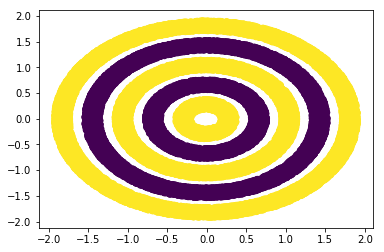

In [34]:
%matplotlib inline
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots()
ax.scatter(stats.zscore(X[:,0]), stats.zscore(X[:,1]), c=y)

### This would require a non linear algorithm to classify the points in yellow and violet strips , even a more kernel based algorithm like svm may not be a great idea to solve a problem like this. Decision trees lack the ability of looking at tangents while svms lack the ability of building a XOR like operator which is required to take union of alternating colored strips. From the looks of it ,you would require atleast 10 straight likes (or neurons) to completely encolse each circle and then atleast 5 hidden layers and one final layer to make the actual classification.

In [30]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', power_t=0.0,alpha=0,hidden_layer_sizes=(3,2,1), random_state=122,activation="logistic",max_iter=120,batch_size=100,momentum=0)
train=int(X.shape[0]*0.7)
clf.fit(X[:train,:], y[:train])
test_X,test_Y=X[train:,:], y[train:]
(test_X.shape[0] - np.sum(np.abs(clf.predict(test_X) - test_Y)))*100/test_X.shape[0]

59.56384857559702

### You would need more and more neurons to enclose the outer circles through various tangent cuts,if the gap between the circles were large we would neither need as many data points or neurons to make tangents. This explains why you would need 13,21,24 as you move forward